In [1]:
# go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from astropy.table import Table, vstack, Column
import glob
import os

import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

## Stack all catalog tables

In [6]:
t = Table.read("../data/augm_gama09GHfin_2.0.cat", format="ascii.ecsv")

In [37]:
# create array that select alls sources that have manually me vetted as proper emission lines
mv = Table.read("../gama09G_H_vetted.csv")

kk = t['id'] < -1 # all false array
for r in mv:
    if r['_11' ] == '1':
        field, ifu, id = r['col0' ], '{:03d}'.format(int(r['_1' ])), int(r['_2' ])
        ll  = t['field'] == field
        ll *= t['ifu'] == ifu
        ll *= t['id']  == id
        #print(field, ifu, id, np.sum(ll))
        kk += ll

In [38]:
t[kk]

field,ifu,id,N,counts,flux,ra_com,dec_com,ddec,dra,x_com,y_com,z_com,dx,dy,dz,sqrt(ev1),sqrt(ev2),size2d,x_ext,y_ext,z_ext,wl_com,dwl,xmin,xmax,ymin,ymax,zmin,zmax,psfit_cnts,psfit_flux,psfit_xc,psfit_yc,psfit_zc,psfit_ra,psfit_dec,psfit_wl,psfit_sigxy,psfit_sigz,psfit_dxy,psfit_dwl,psfit_rchisq,rms_wl_com,touches_nan,touches_edge,nmatchhsc,match1_dist,match1_ra,match1_dec,match1_g_cmodel_mag,match1_g_cmodel_magsigma,match1_photoz_best,match1_EQW_lya,match1_psfit_EQW_lya,match2_dist,match2_ra,match2_dec,match2_g_cmodel_mag,match2_g_cmodel_magsigma,match2_photoz_best,match2_EQW_lya,match2_psfit_EQW_lya,match3_dist,match3_ra,match3_dec,match3_g_cmodel_mag,match3_g_cmodel_magsigma,match3_photoz_best,match3_EQW_lya,match3_psfit_EQW_lya
,,,px,counts,erg / (cm2 s),RA[J2000],Dec[J2000],arcsec,arcsec,px,px,px,px,px,px,px,px,px,px,px,px,A,A,px,px,px,px,px,px,counts,erg / (cm2 s),px,px,px,RA[J2000],Dec[J2000],A,px,px,arcsec,A,,counts,,,,,Deg,Deg,mag,mag,,A,A,,Deg,Deg,mag,mag,,A,A,,Deg,Deg,mag,mag,,A,A
str10,str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
gama09Gfin,032,115,144,1.2130e+00,2.4259e-17,130.157523,2.324346,0.7,0.9,42.24,44.33,525.08,1.46,1.85,1.07,1.45,1.85,2.36,6,8,5,4518.17,-2.14,39,45,41,49,523,528,1.2490e+00,7.3049e-17,42.17,44.34,525.08,130.157533,2.324348,4518.15,2.92,1.96,1.46,-3.92,0.43,1.8874e-03,False,False,4,0.45,130.157406,2.324443,23.43,0.02,0.420,3.08,9.27,0.45,130.157406,2.324443,23.44,0.02,nan,3.10,9.33,0.45,130.157406,2.324443,23.45,0.02,nan,3.15,9.48
gama09Gfin,032,117,267,2.5308e+00,5.0616e-17,130.155925,2.327860,0.9,1.0,53.74,69.63,528.42,1.86,1.96,1.43,1.69,2.11,2.70,8,9,6,4524.85,-2.85,50,58,65,74,526,532,1.9226e+00,1.1473e-16,53.59,69.55,528.47,130.155945,2.327848,4524.94,2.98,2.30,1.49,-4.59,0.78,1.8826e-03,False,False,15,1.27,130.156013,2.327944,22.38,0.02,nan,2.44,5.53,1.27,130.156013,2.327944,23.27,0.02,nan,5.55,12.57,1.27,130.156007,2.327957,22.43,0.02,nan,2.55,5.77
gama09Gfin,032,195,136,1.1684e+00,2.3369e-17,130.155480,2.322120,0.7,0.6,56.94,28.30,942.87,1.38,1.27,1.47,1.38,1.26,1.87,6,5,6,5353.75,-2.94,54,60,26,31,940,946,1.3676e+00,6.2156e-17,56.83,28.32,942.77,130.155494,2.322122,5353.54,2.27,2.63,1.14,-5.25,0.28,1.8768e-03,False,False,4,0.67,130.155462,2.322305,24.11,0.03,nan,4.67,12.41,0.67,130.155462,2.322305,24.11,0.03,nan,4.69,12.47,0.67,130.155462,2.322305,24.10,0.03,0.380,4.64,12.35
gama09Gfin,031,61,102,1.2779e+00,2.5557e-17,130.168959,2.299390,1.0,0.7,66.56,33.92,135.96,1.91,1.46,0.91,2.07,1.22,2.40,9,7,3,3739.92,-1.83,62,71,30,37,134,137,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.1802e-03,False,False,4,0.11,130.168971,2.299419,22.90,0.01,nan,2.40,nan,0.11,130.168971,2.299419,22.90,0.01,nan,2.41,nan,0.11,130.168971,2.299419,22.90,0.01,0.610,2.42,nan
gama09Gfin,031,264,148,1.0386e+00,2.0773e-17,130.169119,2.299409,0.6,0.8,65.41,34.06,577.25,1.11,1.58,1.82,1.10,1.58,1.93,4,6,6,4622.51,-3.63,63,67,31,37,574,580,2.0484e+00,1.3492e-16,65.45,33.91,577.24,130.169113,2.299388,4622.49,3.29,4.29,1.65,-8.58,0.17,1.7771e-03,False,False,4,0.36,130.168971,2.299419,22.90,0.01,nan,1.58,10.26,0.36,130.168971,2.299419,22.90,0.01,nan,1.59,10.30,0.36,130.168971,2.299419,22.90,0.01,0.610,1.59,10.32
gama09Gfin,033,30,126,1.3760e+00,2.7519e-17,130.134023,2.354543,0.9,0.9,104.93,92.47,170.68,1.76,1.79,0.99,1.40,2.08,2.51,8,7,5,3809.36,-1.98,102,110,89,96,169,174,2.2847e+00,1.9473e-16,104.36,92.58,170.73,130.134102,2.354559,3809.46,4.26,2.35,2.13,-4.70,0.29,2.6853e-03,False,False,10,1.55,130.133935,2.354613,25.97,0.13,nan,43.15

In [102]:
jj  = t["dx"] < 2.
jj *= t["dy"] < 2.
jj *= t["dz"] < 2.
jj *= t["flux"] > 2e-17
jj *= ~t["touches_nan"] 
jj *= ~t["touches_edge"] 

In [105]:
np.sum(jj*kk)

129

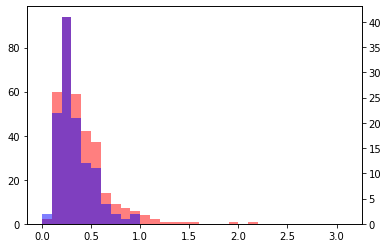

In [106]:

__ = plt.hist( t[jj]["psfit_rchisq"], bins=np.arange(0.,np.nanmax(t["psfit_rchisq"][jj]),.1), alpha=.5, color='r')
plt.twinx()
__ = plt.hist( t[kk]["psfit_rchisq"], bins=np.arange(0.,np.nanmax(t["psfit_rchisq"][kk]),.1), alpha=.5, color='b')


Text(0, 0.5, 'psfit_sigxy')

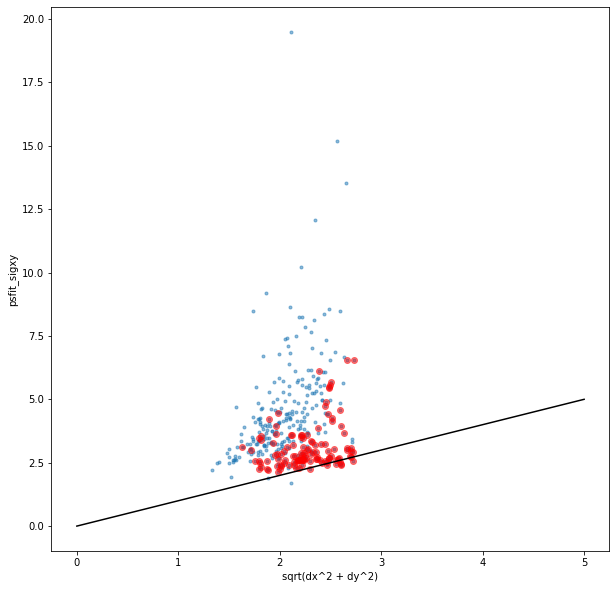

In [108]:
f = plt.figure(figsize=[10,10])
plt.plot(np.sqrt(t["dx"][jj]**2.  + t["dy"][jj]**2.), t["psfit_sigxy"][jj],'.',alpha=.5)

plt.plot(np.sqrt(t["dx"][kk]**2.  + t["dy"][kk]**2.), t["psfit_sigxy"][kk],'ro',alpha=.5)

plt.plot([0., 5.],[0., 5.],'k')

plt.xlabel('sqrt(dx^2 + dy^2)')
plt.ylabel('psfit_sigxy')

In [101]:
np.sum(kk*jj)

30

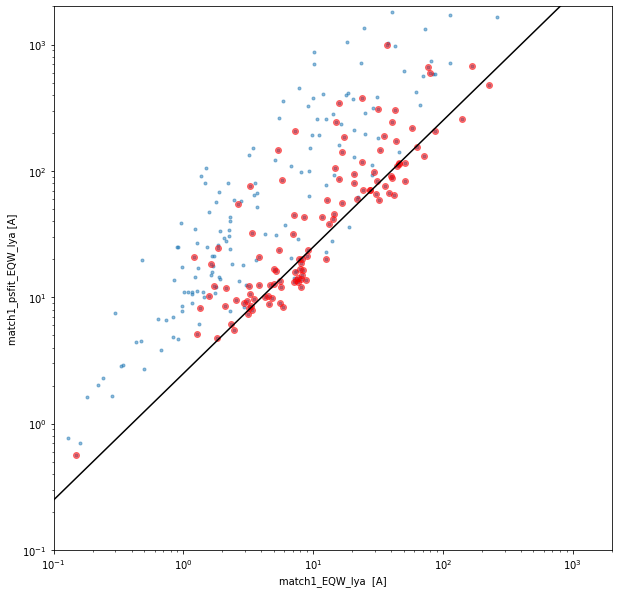

In [110]:
f = plt.figure(figsize=[10,10])
plt.plot( t["match1_EQW_lya"][jj], t["match1_psfit_EQW_lya"][jj],'.',alpha=.5)
plt.plot( t["match1_EQW_lya"][kk], t["match1_psfit_EQW_lya"][kk],'ro',alpha=.5)
plt.xlabel('match1_EQW_lya  [A]')
plt.ylabel('match1_psfit_EQW_lya [A]')
plt.xlim([0.1,2000.])
plt.ylim([0.1,2000.])
plt.xscale('log')
plt.yscale('log')
plt.plot([0., 1000.],[0., 2500.],'k')

Text(0, 0.5, 'dy')

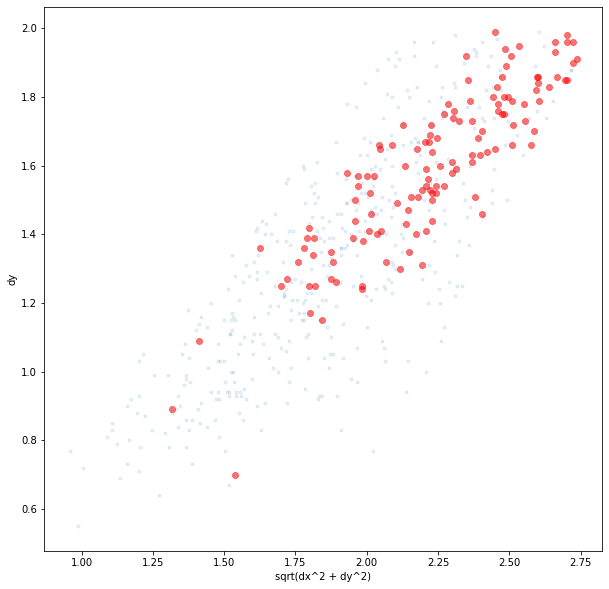

In [111]:
f = plt.figure(figsize=[10,10])
plt.plot(np.sqrt(t["dx"][jj]**2.  + t["dy"][jj]**2.), t["dy"][jj],'.',alpha=.1)

plt.plot(np.sqrt(t["dx"][kk]**2.  + t["dy"][kk]**2.), t["dy"][kk],'ro',alpha=.5)

plt.xlabel('sqrt(dx^2 + dy^2)')
plt.ylabel('dy')

(0.1, 10.0)

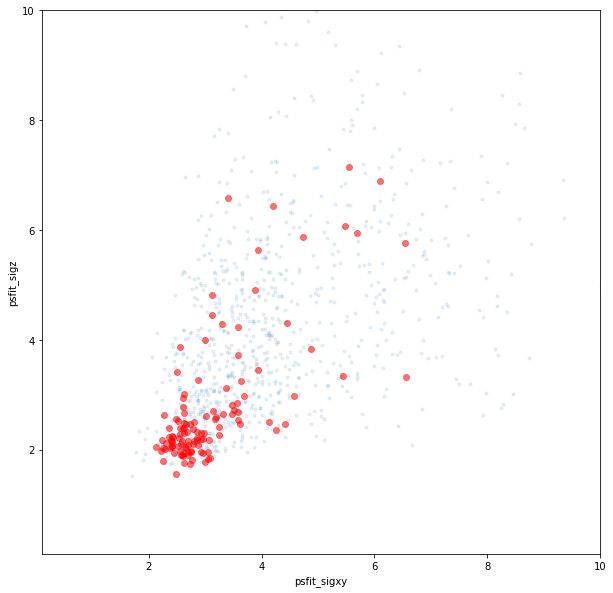

In [96]:
f = plt.figure(figsize=[10,10])
plt.plot(t["psfit_sigxy"][jj], t["psfit_sigz"][jj],'.',alpha=.1)

plt.plot(t["psfit_sigxy"][kk], t["psfit_sigz"][kk],'ro',alpha=.5)


plt.xlabel('psfit_sigxy')
plt.ylabel('psfit_sigz')

plt.xlim([0.1,10.])
plt.ylim([0.1,10.])

(0.1, 2.0)

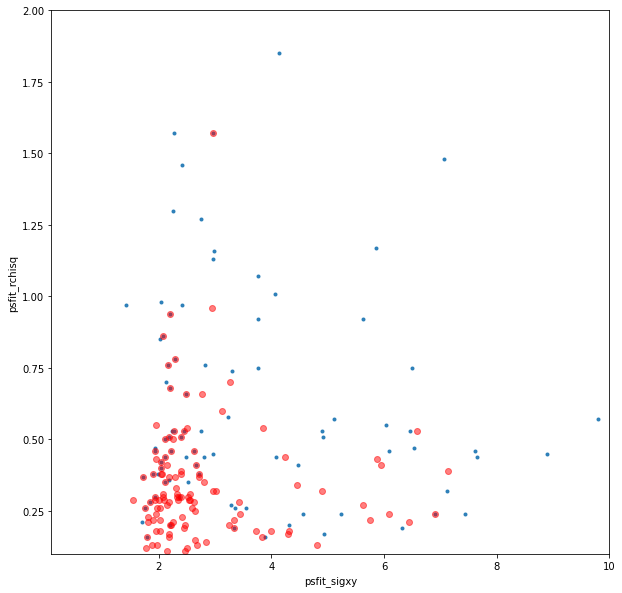

In [99]:
f = plt.figure(figsize=[10,10])
plt.plot(t["psfit_sigz"][jj], t["psfit_rchisq"][jj],'.',alpha=.91)

plt.plot(t["psfit_sigz"][kk], t["psfit_rchisq"][kk],'ro',alpha=.5)


plt.xlabel('psfit_sigxy')
plt.ylabel('psfit_rchisq')

plt.xlim([0.1,10.])
plt.ylim([0.1,2.])

In [98]:
jj  = t["dx"] < 2.
jj *= t["dy"] < 2.
jj *= t["dz"] < 2.
jj *= t["flux"] > 5e-17

In [3]:
sum(jj)

117

In [368]:
ii  = t["field"] == "gama09E"
ii *= t["ifu"] == "022"
ii *= np.abs(t["z_com"] - 978) < 5.
print(sum(ii))

2


In [369]:
t[ii]

field,ifu,id,N,counts,flux,ra_com,dec_com,ddec,dra,x_com,y_com,z_com,dx,dy,dz,sqrt(ev1),sqrt(ev2),size2d,x_ext,y_ext,z_ext,wl_com,dwl,xmin,xmax,ymin,ymax,zmin,zmax
,,,px,counts,erg / (cm2 s),RA[J2000],Dec[J2000],arcsec,arcsec,px,px,px,px,px,px,px,px,px,px,px,px,A,A,px,px,px,px,px,px
str7,str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64
gama09E,022,182,283,2.8485e+00,5.6970e-17,130.203813,2.340026,0.6,0.9,19.88,80.82,975.50,1.17,1.87,8.26,0.76,2.08,2.21,7,10,26,5419.00,52.00,16,23,76,86,962,988
gama09E,022,183,106,9.9626e-01,1.9925e-17,130.194814,2.340123,0.8,0.7,84.62,81.52,977.96,1.52,1.40,1.00,1.57,1.34,2.06,7,5,4,5423.91,8.00,81,88,79,84,976,980


In [256]:
from matplotlib import pyplot as plt
import numpy as np

Text(0, 0.5, 'N')

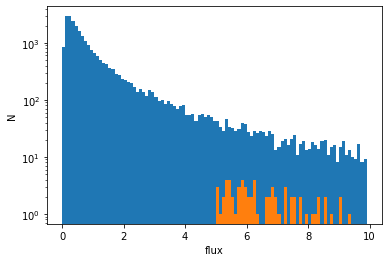

In [257]:
plt.hist(t["flux"]*1e17, bins=np.arange(0,10,.1))
plt.hist(t["flux"][jj]*1e17, bins=np.arange(0,10,.1))
plt.yscale('log')
plt.xlabel("flux")
plt.ylabel("N")

## Move to vetted catalgos

In [258]:
import numpy as np

In [259]:
from astropy.table import join

### Massage table into correct format

In [260]:
from astropy.io import ascii

In [305]:
# create this table by copying only the columns field, ifu, id LAE both from the google sheet
# to a new sheet and then exporting that new sheet to a csv

In [306]:
tvetted = ascii.read("../data/gama09EF_vetted.csv", data_start=2, header_start=0)

In [307]:
tvetted = Table(tvetted, dtype=[str, str, int, int])

In [308]:
tvetted['ifu'] = [ "{:03d}".format( int(ifu) ) for ifu in tvetted['ifu']]
tvetted['id'] = [ "{:d}".format( int(id) ) for ifu in tvetted['id']]

### join tables

In [309]:
tvetted

field,ifu,id,LAE both
str7,str3,int64,int64
gama09E,016,8,0
gama09E,016,10,0
gama09E,016,53,0
gama09E,016,135,0
gama09E,016,143,1
gama09E,024,28,0
gama09E,024,68,0
gama09E,024,131,0
gama09E,024,189,0


In [310]:
t

field,ifu,id,N,counts,flux,ra_com,dec_com,ddec,dra,x_com,y_com,z_com,dx,dy,dz,sqrt(ev1),sqrt(ev2),size2d,x_ext,y_ext,z_ext,wl_com,dwl,xmin,xmax,ymin,ymax,zmin,zmax
,,,px,counts,erg / (cm2 s),RA[J2000],Dec[J2000],arcsec,arcsec,px,px,px,px,px,px,px,px,px,px,px,px,A,A,px,px,px,px,px,px
str7,str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64
gama09E,014,1,121311,1.9397e+04,3.8793e-13,130.191429,2.399630,1.2,1.2,65.39,64.89,650.58,2.42,2.35,242.37,2.46,2.31,3.37,14,14,1007,4769.16,2014.00,58,72,58,72,9,1016
gama09E,014,2,143,4.6193e+00,9.2386e-17,130.194354,2.406894,0.7,1.6,44.35,117.19,16.90,1.48,3.16,2.79,1.21,3.27,3.49,7,12,10,3501.79,20.00,41,48,112,124,10,20
gama09E,014,3,45,1.4482e+00,2.8963e-17,130.196819,2.403462,0.8,1.1,26.61,92.48,15.05,1.58,2.23,2.05,0.51,2.68,2.73,5,7,7,3498.11,14.00,24,29,89,96,11,18
gama09E,014,4,26185,2.9902e+03,5.9803e-14,130.190500,2.392568,1.1,0.9,72.07,14.05,217.54,2.30,1.80,120.35,2.52,1.47,2.92,12,11,416,3903.09,832.00,67,79,9,20,14,430
gama09E,014,5,29359,1.7545e+03,3.5090e-14,130.196553,2.396959,1.0,1.0,28.53,45.66,315.46,1.97,1.97,145.69,1.92,2.02,2.79,13,12,507,4098.93,1014.00,23,36,40,52,13,520
gama09E,014,6,7,2.1887e-01,4.3774e-18,130.197857,2.401711,0.3,0.3,19.15,79.87,22.04,0.63,0.62,0.51,0.82,0.32,0.88,2,2,2,3512.09,4.00,18,20,79,81,21,23
gama09E,014,7,107,2.9909e+00,5.9817e-17,130.195707,2.405111,1.4,1.7,34.61,104.36,34.94,2.71,3.43,1.26,0.96,4.27,4.37,12,14,7,3537.88,14.00,28,40,96,110,31,38
gama09E,014,8,25,6.8686e-01,1.3737e-17,130.196836,2.403151,0.7,0.3,26.49,90.25,35.06,1.31,0.63,0.66,1.31,0.63,1.45,4,2,2,3538.11,4.00,25,29,89,91,34,36


In [311]:
tjoin = join(t,tvetted,keys=["field","ifu","id"])

In [312]:
kk = tjoin["LAE both"] == 1
print("No of confirmed LAE: ", sum(kk))

No of confirmed LAE:  78


In [319]:
tjoin[kk]

field,ifu,id,N,counts,flux,ra_com,dec_com,ddec,dra,x_com,y_com,z_com,dx,dy,dz,sqrt(ev1),sqrt(ev2),size2d,x_ext,y_ext,z_ext,wl_com,dwl,xmin,xmax,ymin,ymax,zmin,zmax,LAE both
,,,px,counts,erg / (cm2 s),RA[J2000],Dec[J2000],arcsec,arcsec,px,px,px,px,px,px,px,px,px,px,px,px,A,A,px,px,px,px,px,px,
str7,str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64
gama09E,013,24,53,5.0376e-01,1.0075e-17,130.207164,2.376065,0.7,0.6,58.68,64.52,215.22,1.47,1.22,1.16,1.53,1.15,1.92,7,5,5,3898.44,10.00,56,63,62,67,213,218,1
gama09E,013,71,114,7.6272e-01,1.5254e-17,130.202689,2.372232,0.8,0.8,90.87,36.93,625.96,1.67,1.61,1.15,1.88,1.36,2.32,7,6,6,4719.93,12.00,87,94,34,40,623,629,1
gama09E,015,35,68,7.4351e-01,1.4870e-17,130.172930,2.386433,0.6,1.1,29.21,76.36,217.73,1.28,2.25,0.77,1.11,2.34,2.59,5,8,3,3903.46,6.00,27,32,73,81,216,219,1
gama09E,015,65,103,1.1188e+00,2.2376e-17,130.168129,2.388398,0.6,1.1,63.74,90.50,303.18,1.14,2.29,1.16,1.14,2.29,2.56,5,11,4,4074.37,8.00,61,66,85,96,301,305,1
gama09E,015,72,84,8.2099e-01,1.6420e-17,130.165959,2.390178,0.6,0.7,79.35,103.32,347.49,1.29,1.49,0.96,1.23,1.53,1.97,5,6,4,4162.98,8.00,77,82,100,106,345,349,1
gama09E,016,143,258,3.1083e+00,6.2165e-17,130.163709,2.449923,0.9,0.9,51.96,88.41,869.54,1.81,1.72,1.37,1.87,1.66,2.50,9,8,6,5207.09,12.00,48,57,84,92,866,872,1
gama09E,021,42,73,6.4478e-01,1.2896e-17,130.215000,2.312447,0.7,0.7,45.88,51.55,285.13,1.43,1.38,1.27,1.72,1.01,1.99,6,6,5,4038.27,10.00,43,49,49,55,283,288,1
gama09E,021,92,75,7.7630e-01,1.5526e-17,130.213105,2.313557,0.6,0.6,59.52,59.54,951.65,1.17,1.29,0.95,1.16,1.29,1.74,5,5,3,5371.29,6.00,57,62,57,62,950,953,1


In [313]:
zz = tjoin["wl_com"][kk]/1216. - 1.

Text(0, 0.5, 'N')

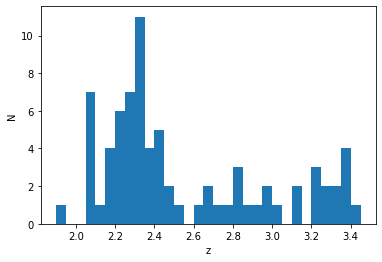

In [314]:
plt.hist(zz, bins=np.arange(1.9,3.5,.05))
plt.xlabel("z")
plt.ylabel("N")

Text(0, 0.5, 'Dec [Deg]')

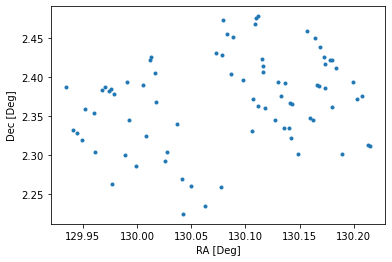

In [315]:
plt.plot(tjoin["ra_com"][kk], tjoin["dec_com"][kk],'.')
plt.xlabel("RA [Deg]")
plt.ylabel("Dec [Deg]")

Text(0, 0.5, 'z')

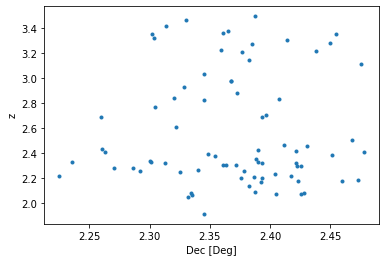

In [316]:
plt.plot(tjoin["dec_com"][kk], zz,'.')
plt.xlabel("Dec [Deg]")
plt.ylabel("z")

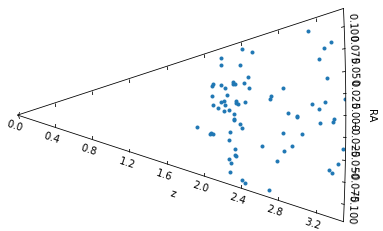

In [317]:
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
from matplotlib.projections import PolarAxes
import matplotlib.pyplot as plt

def setup_axes3(fig, rect):
    tr = PolarAxes.PolarTransform() 

    ra0, ra1 = -.12, .12    #max and min RA vals
    cz0, cz1 = 0, 3.5          #max and min z vals
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")
    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")
    ax1.axis["left"].label.set_text(r"z")
    ax1.axis["top"].label.set_text(r"RA")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  
    ax1.patch.zorder = 0.9  

    return ax1, aux_ax

fig = plt.figure()

ax3, aux_ax3 = setup_axes3(fig, 111)

theta = tjoin["dec_com"][kk]
theta = theta-np.mean(theta)
radius = zz 
aux_ax3.scatter(theta, radius,marker='.')

plt.show()

Text(0, 0.5, 'N')

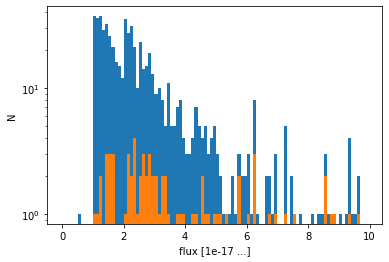

In [377]:
plt.hist(tjoin["flux"]*1e17, bins=np.arange(0,10,.1))
plt.hist(tjoin["flux"][kk]*1e17, bins=np.arange(0,10,.1))
plt.yscale('log')
plt.xlabel("flux [1e-17 ...]")
plt.ylabel("N")

Text(0, 0.5, 'z')

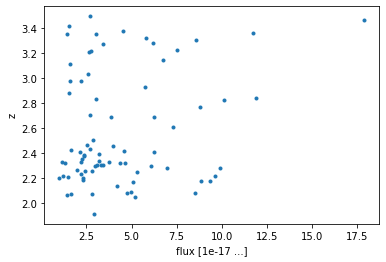

In [382]:
plt.plot(tjoin["flux"][kk]*1e17, zz, '.')
plt.xlabel("flux [1e-17 ...]")
plt.ylabel("z")

In [177]:
np.diff((2.225131, 2.477754))

array([0.252623])

In [374]:
tnew = tjoin

In [375]:
len(tnew)

662

In [372]:
tnew.write("gama09lae.cat", format="ascii.fixed_width")

In [373]:
!pwd

/home/idies/workspace/Storage/mxhf/persistent/mygama09/hetdex-deep


In [376]:
tnew.write("gama09full.cat", format="ascii.fixed_width")